In [7]:
import requests
import os
import sys
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
from utils.eia_api import EIADataPuller 

load_dotenv()

True

In [2]:
from utils.types import FuelType, Respondent


data_puller = EIADataPuller()
data = data_puller.get_power_gen_data(FuelType.NATURAL_GAS, Respondent.PJM)

Querying 2410 rows of data...


In [14]:
df = pd.DataFrame(data)
df = df.sort_values(by='period').reset_index(drop=True)

df['value'] = df['value'].astype(int)
df['period'] = pd.to_datetime(df['period'])
df['year'] = df['period'].dt.year
df['week'] = df['period'].dt.isocalendar().week
df

,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units,year,week
0,2019-01-01,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,394318,megawatthours,2019,1
1,2019-01-02,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,604030,megawatthours,2019,1
2,2019-01-03,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,586040,megawatthours,2019,1
3,2019-01-04,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,630339,megawatthours,2019,1
4,2019-01-05,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,527043,megawatthours,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
2405,2025-08-03,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,941663,megawatthours,2025,31
2406,2025-08-04,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1158172,megawatthours,2025,32
2407,2025-08-05,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1264678,megawatthours,2025,32
2408,2025-08-06,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1261941,megawatthours,2025,32


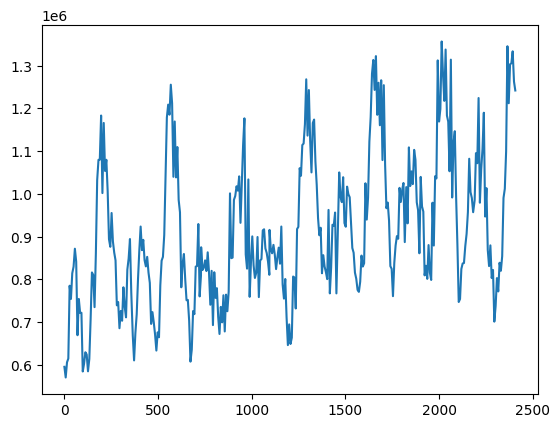

In [21]:
weekly_agg = df.groupby(['year', 'week'])['value'].agg("mean").reset_index()
weekly_agg['days_since'] = (weekly_agg['year'] - 2019) * 365 + (weekly_agg['week'] - 1) * 7
plt.plot(weekly_agg['days_since'], weekly_agg['value'])
